In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from struct import unpack
import os
import matplotlib.dates as mdates
import time

HDF_NAME = 'dat/1991-2020-count.hdf'
if os.path.exists(HDF_NAME):
    print('reading compressed...')
    df = pd.read_hdf(HDF_NAME, 'test')
    print('done')
else:
    HDF_NAME = 'dat/1991_2020.hdf'
    if os.path.exists(HDF_NAME):
        print('reading compressed...')
        df = pd.read_hdf(HDF_NAME, 'test')
        print('counting...')
        df = df.groupby('DD').count()['NOM']
        df = df[df.index.year > 1990]
        print('writing...')
        df.to_hdf('dat/1991-2020-count.hdf', 'test', format='fixed', mode='w', complib='lzo', complevel=3)
df


reading compressed...
done


DD
1991-01-01    1691
1991-01-02    1717
1991-01-03    1626
1991-01-04    1612
1991-01-05    1607
              ... 
2020-12-26    1491
2020-12-27    1507
2020-12-28    1408
2020-12-29     823
2020-12-30     205
Name: NOM, Length: 10957, dtype: int64

In [6]:
import matplotlib.animation as animation

big_angle = 360/12

# inner and outer ring limit values
inner = 10
outer = 30

def dress_axes(ax):
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Here is how we position the months labels

    middles = np.arange(big_angle/2, 360, big_angle)*np.pi/180
    ax.set_xticks(middles)
    ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June',
                        'July', 'August', 'September', 'October', 'November', 'December'])

    ax.set_rlabel_position(359)
    ax.tick_params(axis='both', color='b')
    plt.grid(None, axis='x')
    plt.grid(axis='y', color='b', linestyle=':', linewidth=1)
    # Here is the bar plot that we use as background

    bars = ax.bar(middles, outer, width=big_angle*np.pi/180,
                  bottom=inner, color='lightgray', edgecolor='b', zorder=0)
    # plt.ylim([2, outer])



fig = plt.figure()
ax = plt.subplot(111, polar=True)
line, = ax.plot([], [])

#dress_axes(ax)

t = mdates.date2num(df.index.to_pydatetime())
tnorm = (t-t.min())/(t.max()-t.min())*2.*np.pi
#ax.fill_between(tnorm, df ,0, alpha=0.4)

def animate(i):
    line.set_xdata(tnorm[:i])
    line.set_ydata(df[:i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=tnorm, blit=True)
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

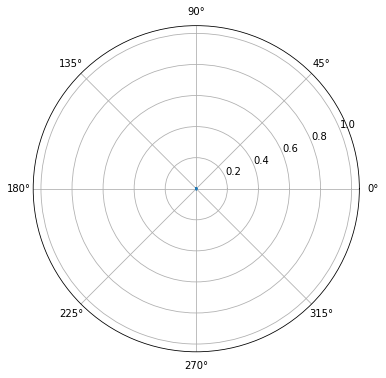

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

# Data:
mu = 1
e = 1
a = 1
c = 1

beta = np.linspace(0.0 ,0.5,25)
C = (mu*((e*a)**2)) / (16*(np.pi**2)*c) 

theta = np.linspace(-2 * np.pi, 2 * np.pi, 200)

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

line, = ax.plot([],[])


def update(b):
    r = (np.sin(theta)**2)/(1 - b*np.cos(theta))**5
    dP = C*r
    line.set_xdata(theta)
    line.set_ydata(dP)
    return line,

ani = FuncAnimation(fig, update, frames=beta, blit=True)
plt.show()